In [550]:
!pip install gql
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
sample_transport=RequestsHTTPTransport(
   url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
   verify=True,
)
client = Client(
   transport=sample_transport
)

In [533]:
query = gql('''
{
swaps(first:1000, orderBy: timestamp, orderDirection: desc, where:
 { pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17" }
) {
     pair {
       token0 {
         symbol
       }
       token0Price
       token1 {
         symbol
       }
       token1Price
       volumeUSD
     }
     id
     timestamp
     amount0In
     amount0Out
     amount1In
     amount1Out
     amountUSD
     to
 }
}
''')

In [534]:
response = client.execute(query)

In [535]:
import pandas as pd
from datetime import datetime
id=[]
for i in range(len(response['swaps'])):
    id.append(response['swaps'][i]['timestamp'])

for i in range(len(response['swaps'])):
    id[i] = datetime.fromtimestamp(int(id[i]))

symbol0_in=[]
symbol0_out=[]
symbol1_in=[]
symbol1_out=[]
symbol0=[]
symbol1=[]
tran_id=[]
volume=[]
for i in range(len(response['swaps'])):
    symbol0_in.append(float(response['swaps'][i]['amount0In']))
    symbol1_in.append(float(response['swaps'][i]['amount1In']))
    symbol0_out.append(float(response['swaps'][i]['amount0Out']))
    symbol1_out.append(float(response['swaps'][i]['amount1Out']))
    symbol0.append(response['swaps'][i]['pair']['token0']['symbol'])
    symbol1.append(response['swaps'][i]['pair']['token1']['symbol'])
    volume.append(float(response['swaps'][i]['amountUSD']))
    tran_id.append(response['swaps'][i]['id'])

dataframe = pd.DataFrame(id)
dataframe.columns=['DateTime']
dataframe['DateTime']=id
dataframe['Transaction_Id']=tran_id
dataframe['Symbol0']=symbol0
dataframe['Symbol1']=symbol1
dataframe['Symbol0_In']=symbol0_in
dataframe['Symbol1_In']=symbol1_in
dataframe['Symbol0_Out']=symbol0_out
dataframe['Symbol1_Out']=symbol1_out
dataframe['Transaction_amount']=volume
dataframe

,DateTime,Transaction_Id,Symbol0,Symbol1,Symbol0_In,Symbol1_In,Symbol0_Out,Symbol1_Out,Transaction_amount
0,2021-06-23 13:13:21,0x00f140310777f189be46163f3b506abcd73493002cf7...,UNI,WETH,55.000000,0.000000,0.000000,0.489112,983.273306
1,2021-06-23 13:09:31,0xb1d81a1986256c6e1f7598343946a22495f583966f85...,UNI,WETH,5.373262,0.000000,0.000000,0.047785,96.023815
2,2021-06-23 13:09:31,0x932047a964197f61ec94427a945369ecf752f05f3206...,UNI,WETH,21.250000,0.000000,0.000000,0.188982,379.756268
3,2021-06-23 13:08:28,0xf0619cee72839c98de52ec0be8c4a74d0bc821a0cb9c...,UNI,WETH,298.866402,0.000000,0.000000,2.658276,5340.306655
4,2021-06-23 13:08:28,0x96283c34b625c921bbaa6cc8d6b5ae0e4ac960fda003...,UNI,WETH,534.479348,0.000000,0.000000,4.755669,9553.836299
...,...,...,...,...,...,...,...,...,...
995,2021-06-21 15:49:31,0x59fdf66a30319e39c8aed7ab2f5c5a61840f5fdd2e9c...,UNI,WETH,866.167588,0.000000,0.000000,7.741735,15375.393795
996,2021-06-21 15:41:49,0xe80dbaf88688f637ea4a00c856b60c868c3f94f3a193...,UNI,WETH,0.000000,0.632221,70.286957,0.000000,1265.377964
997,2021-06-21 15:41:07,0xf85aabf23178478b4b8d50f60754e6315218e686cdc9...,UNI,WETH,843.631654,0.000000,0.000000,7.545400,15042.980051
998,2021-06-21 15:40:42,0xa7cdf77952462dd3fe5d2508358645c93b0225455631...,UNI,WETH,397.764972,0.000000,0.000000,3.559490,7085.147281


# Uniswap In and Out Chart


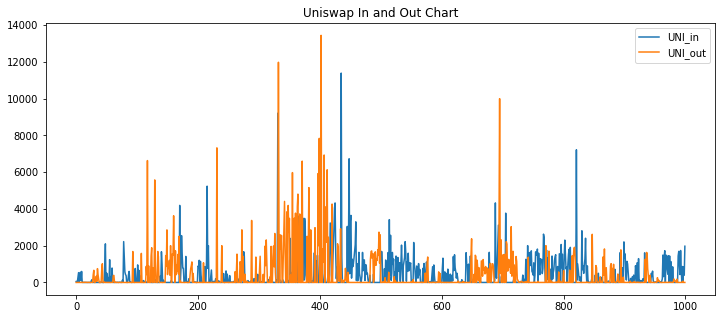

In [536]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title("Uniswap In and Out Chart")
plt.plot(dataframe['Symbol0_In'],label='UNI_in')
plt.plot(dataframe['Symbol0_Out'],label='UNI_out')
plt.legend()

# Etherium(wrapped) In and Out Chart

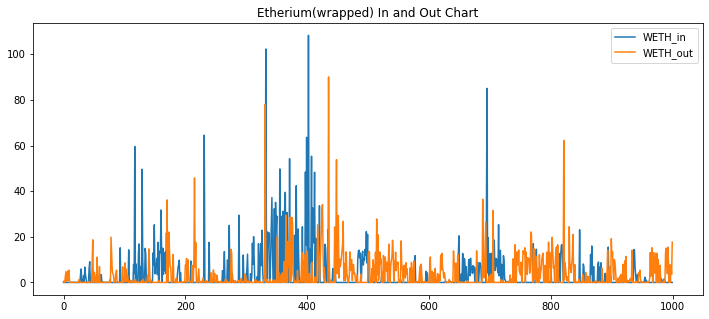

In [537]:
plt.figure(figsize=(12,5))
plt.title("Etherium(wrapped) In and Out Chart")
plt.plot(dataframe['Symbol1_In'],label='WETH_in')
plt.plot(dataframe['Symbol1_Out'],label='WETH_out')
plt.legend()

# Transaction Amount(USD) Chart

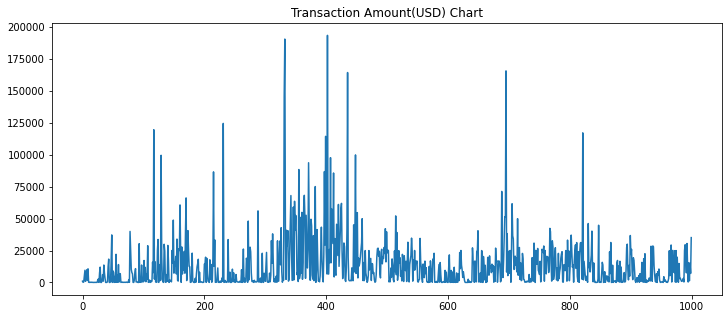

In [538]:
plt.figure(figsize=(12,5))
plt.title("Transaction Amount(USD) Chart")
plt.plot(dataframe['Transaction_amount'])

# Most valued 5 Transactions

In [539]:
sort_data = dataframe.sort_values(["Transaction_amount"],ascending=False)
print("Most valued 5 Transactions")
sort_data[:5]

Most valued 5 Transactions


,DateTime,Transaction_Id,Symbol0,Symbol1,Symbol0_In,Symbol1_In,Symbol0_Out,Symbol1_Out,Transaction_amount
402,2021-06-22 18:27:08,0x6f39d7c546979ed6fcccaf27dba6134ff5dd5eeb002e...,UNI,WETH,0.000000,108.281847,13434.392963,0.000000,193642.507136
332,2021-06-22 21:22:37,0x1cf9734e6bf863d61de3f011111c2e296f93506bfcba...,UNI,WETH,0.000000,102.309203,11970.753434,0.000000,190738.237209
695,2021-06-22 07:15:40,0x1a60c6f3c6e7de4280cea60cf35eac07862b7adac225...,UNI,WETH,0.000000,85.049263,9992.111819,0.000000,165787.275458
435,2021-06-22 17:44:59,0xba7e1f46c0ef25a0722007dad390e91235ebc2c56d6b...,UNI,WETH,11382.412796,0.000000,0.000000,90.053098,164501.780412
331,2021-06-22 21:22:37,0x2a27a61cc7d2e8c1d86878e9159f392df63bff165154...,UNI,WETH,9203.970321,0.000000,0.000000,78.098973,145602.349982


# Least Valued 5 Transaction

In [540]:
sort_data[-5:]

,DateTime,Transaction_Id,Symbol0,Symbol1,Symbol0_In,Symbol1_In,Symbol0_Out,Symbol1_Out,Transaction_amount
632,2021-06-22 10:27:45,0xb1d6eb77ba538fd697ea2312c5a0cb61dfc532553aed...,UNI,WETH,0.000000,0.000507,0.059052,0.000000,0.996100
91,2021-06-23 09:06:25,0x31a7c553a5cc4819bdc82ae55a886d1bef53ef446659...,UNI,WETH,0.054745,0.000000,0.000000,0.000491,0.987598
743,2021-06-22 05:55:27,0xa6f009782b67f6ac1d42d526b192989f150f52a8ff54...,UNI,WETH,0.000000,0.000166,0.020000,0.000000,0.310388
18,2021-06-23 12:20:54,0xeff6c89c76de3091bb998e671b3979d3a5c2d00652e7...,UNI,WETH,0.000000,0.000100,0.011153,0.000000,0.201366
568,2021-06-22 13:03:54,0xa38949446fc8373a28288372d888da4bd7c7e651f400...,UNI,WETH,0.001000,0.000000,0.000000,0.000008,0.016397


In [541]:
dataframe.describe()

,Symbol0_In,Symbol1_In,Symbol0_Out,Symbol1_Out,Transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,420.656027,3.457405,408.856272,3.541007,13180.740263
std,886.856588,9.544960,1139.723258,7.363913,20388.685263
min,0.000000,0.000000,0.000000,0.000000,0.016397
25%,0.000000,0.000000,0.000000,0.000000,538.507343
50%,20.074323,0.000000,0.000000,0.179240,6572.532444
75%,500.000000,0.740410,90.228126,4.276965,19015.334621
max,11382.412796,108.281847,13434.392963,90.053098,193642.507136


# Total Volume in UNI/WETH pair(in billion dollar)

In [549]:
print(float(response['swaps'][0]['pair']['volumeUSD'])/10**9)

6.6354323389170355
